In [7]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../experiments")


from experiment_information import *
from experiment_setup import *
from data import *
from helpers import *
from data_loading import *
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


import numpy as np
import re
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This code assumes that you have defined and run an experiment before using `define_experiment.ipynb` in the `experiments` folder.

In [8]:
df_experiments, df_state_evolution, df_erm = obtain_dataframes(logger)
df_experiments.head(7)

Current code version, 113


,experiment_id,experiment_name,duration,problem_types,code_version,date,state_evolution_repetitions,erm_repetitions,alphas,epsilons,...,taus,ps,dp,d,experiment_type,completed,data_model_types,data_model_names,data_model_descriptions,gamma_fair_error
33,ed1bfdad-23b3-4929-9601-7126e6fea410,SweepAtOptimalLambda,47.452392,"[""Logistic""]",113,2024-06-19 11:51:05,1,10,"[4.0, 4.0526, 4.1053, 4.1579, 4.2105, 4.2632, ...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,SweepAtOptimalLambda,1,"[""KFeaturesModel""]","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
31,f2ad5999-006a-489c-88e4-f924985ee46c,FeatureComparisonsTestOneSubspace,417.302198,"[""Logistic""]",113,2024-06-17 12:07:56,1,10,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
30,042b0fbb-4850-40c4-9dcd-9588e97e6471,FeatureComparisonsTestOneSubspace,22.619816,"[""Logistic""]",113,2024-06-17 11:47:24,1,0,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
29,7b24b808-04ae-43fc-b7aa-915d8f5978eb,OptimalDefense,12.160757,"[""Logistic""]",113,2024-06-17 10:59:59,1,0,[10000.0],"[0.01, 0.0105, 0.011, 0.0115, 0.0121, 0.0126, ...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
28,5d1a0552-f9e3-4c29-a0ec-6cf0e8026939,OptimalDefense,30.573092,"[""Logistic""]",113,2024-06-17 10:53:17,1,0,[10000.0],"[0.001, 0.0011, 0.0012, 0.0013, 0.0015, 0.0016...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
27,05d18b6e-be5a-4afb-bfb3-2715b169cf61,OptimalDefense,13.010985,"[""Logistic""]",113,2024-06-17 10:47:14,1,0,[10000.0],"[0.001, 0.0013, 0.0016, 0.0021, 0.0026, 0.0034...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
25,92d5bf7d-8a48-4c32-88fc-5a08b3565399,FeatureComparisonsTestOneSubspace,337.314815,"[""Logistic""]",113,2024-06-17 10:40:34,1,10,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.1],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001


In [9]:
experiment_loc = 0

# extract experiment by id "250fa46e-55cb-40d2-b503-11b38823235d"
# experiment_id = "d43ae27a-cf92-4261-a7d1-de5c9717f775"


# extract and print the top experiment_id
experiment_id = df_experiments.iloc[experiment_loc]["experiment_id"]
print(experiment_id)

# extract and print the experiment type
experiment_type = df_experiments.iloc[experiment_loc]["experiment_type"]
print(experiment_type)

# extract and print the data model type and data_model name used
data_model_types = df_experiments.iloc[experiment_loc]["data_model_types"]
# convert it to the enum
data_model_types = [DataModelType[data_model_type] for data_model_type in json.loads(data_model_types)]
data_model_names = [name for name in json.loads(df_experiments.iloc[experiment_loc]["data_model_names"])]
data_model_descriptions = df_experiments.iloc[experiment_loc]["data_model_descriptions"]
for data_model_type in data_model_types:
    print(data_model_type.name)
print(data_model_names)
print(data_model_descriptions)

# print the experiment name
experiment_name = df_experiments.iloc[experiment_loc]["experiment_name"]
print(experiment_name)

# print the experiment problem types
experiment_problem_types = df_experiments.iloc[experiment_loc]["problem_types"]
experiment_problem_types = json.loads(experiment_problem_types)
print(experiment_problem_types)

ed1bfdad-23b3-4929-9601-7126e6fea410
SweepAtOptimalLambda
KFeaturesModel
['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1___SweepAtOptimalLambda']
["2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity"]
SweepAtOptimalLambda
['Logistic']


In [10]:
data_model_name_dict = {}
data_model_name_dict["VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["2_VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["VanillaGaussianThetaFirst"] = "Vanilla Gaussian - Teacher 10:1"
data_model_name_dict["VanillaGaussianTimes10"] = "Vanilla Gaussian x10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[10  1]"] = "Strong Weak 5:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[10  1]"] = "Strong Weak 10:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[ 1 10]"] = "Strong Weak 5:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[ 1 10]"] = "Strong Weak 10:1 - Teacher 1:10"


In [11]:
state_evolution = df_state_evolution[df_state_evolution["experiment_id" ] == experiment_id]
gd = df_erm[df_erm["experiment_id" ] == experiment_id]
# make the column subspace_overlaps to string
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))

# create a json colum
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: json.loads(x))
from pandas import json_normalize
# normalize the json column
normalized = json_normalize(state_evolution["subspace_overlaps"])
normalized_gd = json_normalize(gd["subspace_overlaps"])



def explode_array_column(row, col):
    return pd.Series(row[col])

# reset the index of the original dataframe
state_evolution = state_evolution.reset_index(drop=True)
gd = gd.reset_index(drop=True)

for col in normalized.columns:
    expanded_cols = normalized.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)
    state_evolution = pd.concat([state_evolution, expanded_cols], axis=1)

for col in normalized_gd.columns:
    expanded_cols = normalized_gd.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)

    gd = pd.concat([gd, expanded_cols], axis=1)



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_21818/3541688095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_21818/3541688095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_21818/3541688095.py:8: 

In [12]:
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: str(x))
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(state_evolution["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
state_evolution = pd.concat([state_evolution, normalized], axis=1)
# drop the original subspace_overlaps column
state_evolution = state_evolution.drop(columns=["subspace_overlaps_ratio"])

gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: str(x))
gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(gd["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
gd = pd.concat([gd, normalized], axis=1)
# drop the original subspace_overlaps column
gd = gd.drop(columns=["subspace_overlaps_ratio"])


In [13]:
# create a column for the difference between the adversarial_generalization_error and the generalization_error for both the state evolution and the erm
state_evolution["difference_adv_gen"] = state_evolution["adversarial_generalization_error"] - state_evolution["generalization_error"]
gd["difference_adv_gen"] = gd["adversarial_generalization_error"] - gd["generalization_error_erm"]


state_evolution["ratio_adv_gen"] = state_evolution["adversarial_generalization_error"] / state_evolution["generalization_error"]
gd["ratio_adv_gen"] = gd["adversarial_generalization_error"] / gd["generalization_error_erm"]

In [14]:
# create a column for the noise contribution
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

state_evolution["noise_contribution"] = state_evolution.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)
gd["noise_contribution"] = gd.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)

In [15]:
# create a column for the noiseless generalization error without the noise contribution
state_evolution["noiseless_generalization_error"] = state_evolution["generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_generalization_error_erm"] = gd["generalization_error_erm"] - gd["noise_contribution"]

# create a column for the adversarial noiseless generalization error without the noise contribution
state_evolution["noiseless_adversarial_generalization_error"] = state_evolution["adversarial_generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_adversarial_generalization_error"] = gd["adversarial_generalization_error"] - gd["noise_contribution"]

In [16]:
# create a column for the A/sqrt(q*N) for both the state evolution and the erm
state_evolution["A_over_sqrt_qN"] = state_evolution["A"] / np.sqrt(state_evolution["q"] * state_evolution["N"])
gd["A_over_sqrt_qN"] = gd["A"] / np.sqrt(gd["q"] * gd["N"])

In [17]:
# create a column for m/sqrt( rho*q - m**2 ) vs A/sqrt(q*N) for both the state evolution and the erm
state_evolution["m_over_sqrt_rhoq_minus_m2"] = state_evolution["m"] / np.sqrt(state_evolution["rho"] * state_evolution["q"] - state_evolution["m"]**2)
gd["m_over_sqrt_rhoq_minus_m2"] = gd["m"] / np.sqrt(gd["rho"] * gd["q"] - gd["m"]**2)


In [18]:
# strip the data_model_name if there is a sequence ___text at the end
def strip_data_model_name(data_model_name):
    return re.sub(r"___.*","",data_model_name)
state_evolution["data_model_name"] = state_evolution["data_model_name"].apply(strip_data_model_name)
gd["data_model_name"] = gd["data_model_name"].apply(strip_data_model_name)

In [19]:
gd = gd.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","data_model_name"]) #,"p_calibration"
state_evolution = state_evolution.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","data_model_name"]) #,"p_calibration"

# drop id, code_version, experiment_id, date, initial_condition, test_against_epsilons, calibrations, abs_tol, min_iter,max_iter,blend_fpe,int_lims,subspace_overlaps
state_evolution = state_evolution.drop(columns=["id","code_version","experiment_id","date","initial_condition","test_against_epsilons","calibrations","abs_tol","min_iter","max_iter","blend_fpe","int_lims","subspace_overlaps","data_model_type","data_model_description"])
# drop id, code_version, experiment_id, test_against_epsilons, date, subspace_overlaps, analytical_calibrations, erm_calibrations, 
gd = gd.drop(columns=["id","code_version","experiment_id","test_against_epsilons","date","subspace_overlaps","analytical_calibrations","erm_calibrations","data_model_type","data_model_description"])

state_evolution.columns = [col+"_state_evolution" for col in state_evolution.columns]
gd.columns = [col+"_erm" for col in gd.columns]

state_evolution = state_evolution.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
gd = gd.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
df = state_evolution.join(gd, how="outer")
df.sort_index()
df

index_state_evolution  \
                                                                                                                                  mean   
alpha  epsilon tau  lam           problem_type attack_epsilon data_model_name                                                            
4.0000 0.0     0.05  6.834190e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61380.0   
       0.1     0.05  6.425580e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61381.0   
       0.2     0.05  3.786880e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61382.0   
       0.3     0.05 -9.900000e-07 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61383.0   
4.0526 0.0     0.05  6.706640e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61384.0   
...                                                                                                                                ...   
4.9474 0.3     0.05 -9.900000e-07 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61455.0   
5.0000 0.0     0.05  4.959560e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61456.0   
       0.1     0.05  4.290300e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61457.0   
       0.2     0.05  1.335140e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61458.0   
       0.3     0.05 -9.900000e-07 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro...               61459.0   

                                                                                                                      \
                                                                                                                 std   
alpha  epsilon tau  lam           problem_type attack_epsilon data_model_name                                          
4.0000 0.0     0.05  6.834190e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
       0.1     0.05  6.425580e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
       0.2     0.05  3.786880e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
       0.3     0.05 -9.900000e-07 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
4.0526 0.0     0.05  6.706640e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
...                                                                                                               ..   
4.9474 0.3     0.05 -9.900000e-07 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
5.0000 0.0     0.05  4.959560e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
       0.1     0.05  4.290300e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
       0.2     0.05  1.335140e-03 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   
       0.3     0.05 -9.900000e-07 Logistic     0.1            KFeaturesModel_TwoFeatures_ProtectingSecondStro... NaN   

                                                                                                                 duration_state_evolution  \
                                                                                                                                     mean   
alpha  epsilon tau  lam           problem_type attack_epsilon data_model_name                                                               
4.0000 0.0     0.05  6.834190e-03 Logistic     0.1            KFeaturesModel

In [20]:
list(df.columns)

[('index_state_evolution', 'mean'),
 ('index_state_evolution', 'std'),
 ('duration_state_evolution', 'mean'),
 ('duration_state_evolution', 'std'),
 ('generalization_error_state_evolution', 'mean'),
 ('generalization_error_state_evolution', 'std'),
 ('training_loss_state_evolution', 'mean'),
 ('training_loss_state_evolution', 'std'),
 ('training_error_state_evolution', 'mean'),
 ('training_error_state_evolution', 'std'),
 ('sigma_state_evolution', 'mean'),
 ('sigma_state_evolution', 'std'),
 ('q_state_evolution', 'mean'),
 ('q_state_evolution', 'std'),
 ('Q_self_state_evolution', 'mean'),
 ('Q_self_state_evolution', 'std'),
 ('m_state_evolution', 'mean'),
 ('m_state_evolution', 'std'),
 ('angle_state_evolution', 'mean'),
 ('angle_state_evolution', 'std'),
 ('rho_state_evolution', 'mean'),
 ('rho_state_evolution', 'std'),
 ('sigma_hat_state_evolution', 'mean'),
 ('sigma_hat_state_evolution', 'std'),
 ('q_hat_state_evolution', 'mean'),
 ('q_hat_state_evolution', 'std'),
 ('m_hat_state_ev

In [21]:
# store the dataframe as a pickle file
if not os.path.exists("Pickles"):
    os.makedirs("Pickles")
if not os.path.exists("Pickles/gen_optimal_lam_alpha.pkl"):
    df.to_pickle("Pickles/gen_optimal_lam_alpha.pkl")

In [22]:
# load the dataframe from the pickle file
# df = pd.read_pickle("Pickles/gen_optimal_lam_alpha.pkl")

# extracting the data

In [23]:
# get unique epsilons
epsilons = df.index.get_level_values(1).unique()
epsilons

Index([0.0, 0.1, 0.2, 0.3], dtype='float64', name='epsilon')

In [24]:
# get unique attack_epsilons
attack_epsilons = df.index.get_level_values(5).unique()
attack_epsilons

Index([0.1], dtype='float64', name='attack_epsilon')

In [25]:
# create a dictionary of dataframes for each data_model_name
epsilon_dict = {}
for epsilon in epsilons:

    eps_df = df.xs(epsilon, level="epsilon")

    

    

    alphas = eps_df.index.get_level_values("alpha").unique()
    adversarial_error_0 = eps_df["adversarial_generalization_error_state_evolution"]["mean"].values
    generalization_error_0 = eps_df["generalization_error_state_evolution"]["mean"].values
    boundary_error_0 = eps_df["difference_adv_gen_state_evolution"]["mean"].values

    alphas = np.array(alphas)
    adversarial_error_0 = np.array(adversarial_error_0)
    generalization_error_0 = np.array(generalization_error_0)
    boundary_error_0 = np.array(boundary_error_0)

    eps_0_dict = {}
    eps_0_dict["alphas"] = alphas
    eps_0_dict["adversarial_error"] = adversarial_error_0
    eps_0_dict["generalization_error"] = generalization_error_0
    eps_0_dict["boundary_error"] = boundary_error_0


    epsilon_dict[epsilon] = eps_0_dict


In [26]:
np.argmin(epsilon_dict[0.2]["generalization_error"])

19

# Figure saving

Figure size:  [1.75 2.4 ]


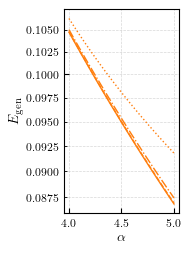

In [27]:

IMG_DIRECTORY = "./Assets/gen_optimal_lambda_alpha"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.75 * 458.63788

plt.style.use("../latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = (1.75 , 2.4)

multiplier = 0.9
second_multiplier = 0.35

fig, axs = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    figsize=( tuple_size[0],  tuple_size[1]),
    gridspec_kw={"hspace": 0},
)

# print the figure size
print("Figure size: ", fig.get_size_inches())


# ICML adjustments
fig.subplots_adjust(left=0.33)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(right=0.99)

linestyles = ["solid", "dashed", "dashdot", "dotted"]

for idx, (epsilon, eps_dict) in enumerate(epsilon_dict.items()):


    alphas = eps_dict["alphas"]
    adversarial_error = eps_dict["adversarial_error"]
    generalization_error = eps_dict["generalization_error"]
    boundary_error = eps_dict["boundary_error"]


    # axs.plot(lams, adversarial_error, label=r"$E_{\mathrm{adv}}$", color="C0", linestyle=linestyles[idx])
    axs.plot(alphas, generalization_error, color="C1", linestyle=linestyles[idx])
    # axs.plot(lams, boundary_error, label=r"$E_{\mathrm{bound}}$", color="C2", linestyle=linestyles[idx])

import matplotlib as mpl


# axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylabel(r"$E_{\mathrm{gen}}$", labelpad=2.0)
axs.set_xlabel(r"$\alpha$", labelpad=2.0)
axs.grid(which="both", axis="both", alpha=0.5)
axs.tick_params(axis="both", which="major", direction="in")
axs.tick_params(axis="both", which="minor", direction="in")

# axs.legend(title="$\\boldsymbol{a}$",loc="lower left")

# axs.ticklabel_format(axis="y", style='sci', scilimits=(-2, 2))
# make the y axis not have number*10^-1, but number with the scale 10^-1
axs.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.4f'))
axs.yaxis.set_minor_formatter(mpl.ticker.FormatStrFormatter('%.4f'))

from matplotlib.lines import Line2D

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

# fig.legend(handles=epsilon_legend, loc="upper center", ncol=4, handlelength=1.5)



# plt.tight_layout()

save = True
if save:
    save_plot(
        fig,
        "gen_lambda_optimal_sweep_alpha",
    )

plt.show()